# **Разведочный анализ по датасету IMDb Movies: 5000 фильмов с наибольшим рейтингом. Часть 2: Анализ количественных и категориальных признаков, а также взаимосвязи признаков**

![](https://adabul.com/wp-content/uploads/2020/04/diziler-360x240.jpg)

## 1. Описание датасета и задания

Представлен датасет с данными о 5000 фильмах, имеющих наибольший рейтинг на сайте IMDb (датасет выложен на платформе [Kaggle](https://www.kaggle.com/datasets/totoro29/imdb-movies)).

***Информация, содержащаяся в датасете:***
1.   Ссылка на постер фильма (poster).
2.   Наименование фильма (title).
3.   Класс фильма по рейтингу the British Board of Film Classification (BBFC) (certificate).
4.   Продолжительность фильма (runtime).
5.   Жанр фильма (genre).
6.   Рейтинг фильма на платформе IMBD (rating).
7.   Описание сюжета фильма (about).
8.   Кинорежиссер фильма (director).
9.   Актеры-звезды фильма (stars).
10.  Количество проголосовавших за фильм (votes).
11.  Доход с фильма (gross_earn).

***Задача:***
провести разведочный анализ данных, найти взаимосвязи и сформулировать выводы.

**В части 2 задания необходимо:**
1.   Выполнить неграфический и графический анализ количественных признаков.
2.   Выполнить неграфический и графический анализ категориальных признаков.
3.   Выполнить анализ взаимосвязи двух количественных признаков.
4.   Выполнить анализ взаимосвязи двух категориальных признаков.
5.   Выполнить анализ взаимосвязи количественного и категориального признаков.

****Задания со звездочкой факультативные (дополнительные)***

## 2. Загрузка датасета

Импортируйте модуль files для подгрузки датасета с ПК

In [ ]:
from google.colab import files

Загрузите файл movies_clean.csv (сохранен по итогу выполнения предыдущего задания) с помощью files.upload()

In [ ]:
files.upload()

Saving movies_clean.csv to movies_clean (2).csv


{'movies_clean (2).csv': b',poster,title,certificate,runtime,genre,rating,about,director,stars,votes,gross_earn,runtime_clear,gross_earn_clear\n0,https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png,The Shawshank Redemption,15,142 min,Drama,9.3,"Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.",Frank Darabont,"(\'Tim Robbins\',), (\'Morgan Freeman\',), (\'Bob Gunton\',), (\'William Sadler\',)","26,26,905",$28.34M,142,28.34\n1,https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png,The Dark Knight,12A,152 min,"Action, Crime, Drama",9.0,"When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.",Christopher Nolan,"(\'Christian Bale\',), (\'Heath Ledger\',), (\'Aaron Eckhart\',), (\'Michael Caine\',)","25,98,173",$534.86M,152,534.86\n2,https://m.media-amazon.com/images/S/sash/4

## 3. Подгрузка данных в питон и начало работы с ними

Импортируйте библиотеку pandas и присвойте ей короткое название pd

In [ ]:
import pandas as pd

Откройте датасет movies_clean.csv и сохраните его в переменную dataset

In [ ]:
dataset = pd.read_csv('movies_clean (2).csv')

Проведите обзор таблицы с помощью метода head()

In [ ]:
dataset.head()

,Unnamed: 0,poster,title,certificate,runtime,genre,rating,about,director,stars,votes,gross_earn,runtime_clear,gross_earn_clear
0,0,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Shawshank Redemption,15,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,"('Tim Robbins',), ('Morgan Freeman',), ('Bob G...","26,26,905",$28.34M,142,28.34
1,1,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Dark Knight,12A,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,"('Christian Bale',), ('Heath Ledger',), ('Aaro...","25,98,173",$534.86M,152,534.86
2,2,https://m.media-amazon.com/images/S/sash/4Fyxw...,Inception,12A,148 min,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,Christopher Nolan,"('Leonardo DiCaprio',), ('Joseph Gordon-Levitt...","23,04,062",$292.58M,148,292.58
3,3,https://m.media-amazon.com/images/S/sash/4Fyxw...,Fight Club,18,139 min,Drama,8.8,An insomniac office worker and a devil-may-car...,David Fincher,"('Brad Pitt',), ('Edward Norton',), ('Meat Loa...","20,71,088",$37.03M,139,37.03
4,4,https://m.media-amazon.com/images/S/sash/4Fyxw...,Pulp Fiction,18,154 min,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,"('John Travolta',), ('Uma Thurman',), ('Samuel...","20,11,013",$107.93M,154,107.93


Удалите столбец 'Unnamed: 0' как ненужный с помощью метода drop(), передав в него параметры columns и inplace=True

In [ ]:
dataset.drop(columns='Unnamed: 0', inplace=True)

## 4. Оценка размеров датасета, выбор признаков для анализа

Оцените размеры датасета с помощью атрибута shape

In [ ]:
dataset.shape

(4970, 13)

Выведите информацию о датасете с помощью метода info()

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4970 entries, 0 to 4969
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   poster            4970 non-null   object 
 1   title             4970 non-null   object 
 2   certificate       4970 non-null   object 
 3   runtime           4970 non-null   object 
 4   genre             4970 non-null   object 
 5   rating            4970 non-null   float64
 6   about             4956 non-null   object 
 7   director          4970 non-null   object 
 8   stars             4970 non-null   object 
 9   votes             4970 non-null   object 
 10  gross_earn        4574 non-null   object 
 11  runtime_clear     4970 non-null   int64  
 12  gross_earn_clear  4574 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 504.9+ KB


**Признаки, которые будут использованы для дальнейшего анализа:**

***Количественные признаки:***
1.   Продолжительность фильма: runtime_clear
2.   Доход с фильма: gross_earn_clear

***Категориальные признаки:***
1.   Наименование фильма: title
2.   Класс фильма: certificate
3.   Жанр фильма: genre
4.   Рейтинг фильма: rating
5.   Кинорежиссер: director
6.   Актеры-звезды фильма: stars


## 5. Неграфический и графический анализ количественных признаков

Выполните неграфический и графический анализ количественных признаков

### *5.1. gross_earn_clear*

Сохраните Series ['gross_earn_clear'] в переменную gross_earn

In [ ]:
gross_earn = dataset['gross_earn_clear']

Рассчитайте максимальное и минимальное значения доходов с фильмов с помощью методов max() и min() соответственно. Выведите значения на печать

In [ ]:
max_value = dataset['gross_earn_clear'].max()
min_value = dataset['gross_earn_clear'].min()
print('Наибольший доход: ', max_value, 'Наименьший доход: ', min_value)

Наибольший доход:  936.66 Наименьший доход:  0.0


Рассмотрите наблюдения, у которых значение по признаку gross_earn равно 0.0

In [ ]:
dataset[dataset['gross_earn_clear']==0.0]

,poster,title,certificate,runtime,genre,rating,about,director,stars,votes,gross_earn,runtime_clear,gross_earn_clear
868,https://m.media-amazon.com/images/S/sash/4Fyxw...,Mr. Nobody,15,141 min,"Drama, Fantasy, Romance",7.8,A boy stands on a station platform as a train ...,Jaco Van Dormael,"('Jared Leto',), ('Sarah Polley',), ('Diane Kr...","2,32,030",$0.00M,141,0.0
2631,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Condemned,18,114 min,"Action, Crime, Thriller",6.0,Jack Conrad is awaiting the death penalty in a...,Scott Wiper,"('Steve Austin',), ('Vinnie Jones',), ('Nathan...","52,430",$0.00M,114,0.0
2788,https://m.media-amazon.com/images/S/sash/4Fyxw...,Perfect Sense,15,92 min,"Drama, Romance, Sci-Fi",7.0,A chef and a scientist fall in love as an epid...,David Mackenzie,"('Ewan McGregor',), ('Eva Green',), ('Lauren T...","60,249",$0.00M,92,0.0
3049,https://m.media-amazon.com/images/S/sash/4Fyxw...,Wild Card,15,92 min,"Action, Crime, Drama",5.6,When a Las Vegas bodyguard with lethal skills ...,Simon West,"('Jason Statham',), ('Michael Angarano',), ('D...","55,803",$0.00M,92,0.0
3110,https://m.media-amazon.com/images/S/sash/4Fyxw...,Adam's Apples,R,94 min,"Comedy, Crime, Drama",7.7,A neo-Nazi sentenced to community service at a...,Anders Thomas Jensen,"('Ulrich Thomsen',), ('Mads Mikkelsen',), ('Ni...","50,694",$0.00M,94,0.0
3241,https://m.media-amazon.com/images/S/sash/4Fyxw...,Ginger Snaps,18,108 min,"Drama, Fantasy, Horror",6.8,"Two death-obsessed sisters, outcasts in their ...",John Fawcett,"('Emily Perkins',), ('Katharine Isabelle',), (...","47,082",$0.00M,108,0.0
3416,https://m.media-amazon.com/images/S/sash/4Fyxw...,Nothing But the Truth,15,108 min,"Crime, Drama",7.2,"In Washington, D.C., a reporter faces a possib...",Rod Lurie,"('Kate Beckinsale',), ('Matt Dillon',), ('Vera...","38,253",$0.00M,108,0.0
3732,https://m.media-amazon.com/images/S/sash/4Fyxw...,Flypaper,15,87 min,"Comedy, Crime, Mystery",6.3,A man caught in the middle of two simultaneous...,Rob Minkoff,"('Patrick Dempsey',), ('Ashley Judd',), ('Tim ...","33,003",$0.00M,87,0.0
3812,https://m.media-amazon.com/images/S/sash/4Fyxw...,Pusher,18,110 min,"Crime, Thriller",7.3,A drug pusher grows increasingly desperate aft...,Nicolas Winding Refn,"('Kim Bodnia',), ('Zlatko Buric',), ('Laura Dr...","39,929",$0.00M,110,0.0
4101,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Oxford Murders,15,108 min,"Adventure, Crime, Horror",6.1,"At Oxford University, a professor and a grad s...",Álex de la Iglesia,"('Elijah Wood',), ('John Hurt',), ('Leonor Wat...","29,257",$0.00M,108,0.0


Таких значений не так много. Можно их исключить из анализа. Перезапишите переменную gross_earn, исключив нулевые значения

In [ ]:
gross_earn = dataset[dataset['gross_earn_clear']!=0.0]['gross_earn_clear']

Снова рассчитайте максимальное и минимальное значения доходов с фильмов. Выведите значения на печать

In [ ]:
max_value = dataset['gross_earn_clear'].max()
min_value = dataset['gross_earn_clear'].min()
print('Наибольший доход: ', max_value, 'Наименьший доход: ', min_value)

Наибольший доход:  936.66 Наименьший доход:  0.0


Рассчитайте среднее значение признака с помощью метода mean(). Выведите значение на печать

In [ ]:
mean_value = dataset['gross_earn_clear'].mean()
print('Средний доход с фильма: ', mean_value)

Средний доход с фильма:  48.907146917358986


Рассчитайте медианное значение признака с помощью метода median(). Выведите значение на печать

In [ ]:
median_value = dataset['gross_earn_clear'].median()
print('Медиана доходов фильмов: ', median_value)

Медиана доходов фильмов:  28.085


Рассчитайте процентили (10, 25, 50, 75, 90) с помощью метода quantile(). Выведите значения на печать

In [ ]:
percentile_10_value = dataset['gross_earn_clear'].quantile(0.10)
percentile_25_value = dataset['gross_earn_clear'].quantile(0.25)
percentile_50_value = dataset['gross_earn_clear'].quantile(0.50)
percentile_75_value = dataset['gross_earn_clear'].quantile(0.75)
percentile_90_value = dataset['gross_earn_clear'].quantile(0.90)
print('10-й процентиль доходов фильмов: ', percentile_10_value)
print('25-й процентиль доходов фильмов: ', percentile_25_value)
print('50-й процентиль доходов фильмов: ', percentile_50_value)
print('75-й процентиль доходов фильмов: ', percentile_75_value)
print('90-й процентиль доходов фильмов: ', percentile_90_value)

10-й процентиль доходов фильмов:  0.74
25-й процентиль доходов фильмов:  6.7975
50-й процентиль доходов фильмов:  28.085
75-й процентиль доходов фильмов:  62.5725
90-й процентиль доходов фильмов:  121.68799999999999


Выведите показатели описательной статистики с помощью метода describe()

In [ ]:
gross_earn.describe()

count    4558.000000
mean       49.078826
std        67.171717
min         0.010000
25%         7.000000
50%        28.345000
75%        63.040000
max       936.660000
Name: gross_earn_clear, dtype: float64

Импортируйте библиотеку matplotlib с расширением pyplot, присвоив короткое название plt

In [ ]:
import matplotlib.pyplot as plt


Постройте диаграмму "ящик с усами" с помощью метода boxplot()

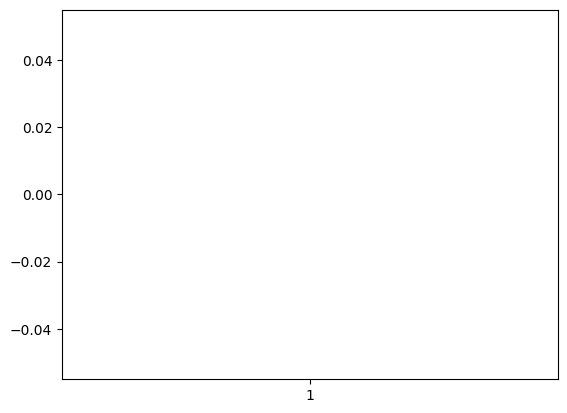

In [ ]:
plt.boxplot(gross_earn)
plt.show()

Диаграмма пустая. Это связано с наличием пропущенных значений по признаку.
<br>Попробуйте построить гистограмму с помощью метода hist(), чтобы посмотреть на распределение признака.

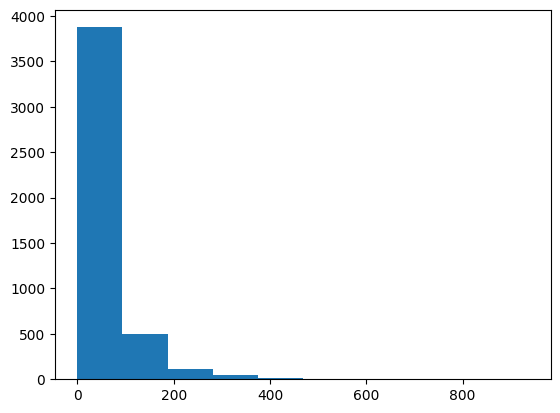

In [ ]:
plt.hist(gross_earn)
plt.show()

Гистограмма показывает, на достаточно большой размах в данных, что подтверждается и показателями описательной статистики (min и max). Ограничьте графический анализ 10 процентилем снизу и 90 процентилем сверху, тем самым обработав часть выбросов, и заново постройте "ящик с усами"

In [ ]:
gross_earn_2 = dataset[
    (dataset['gross_earn_clear']>=percentile_10_value)&
    (dataset['gross_earn_clear']<=percentile_90_value)]['gross_earn_clear']

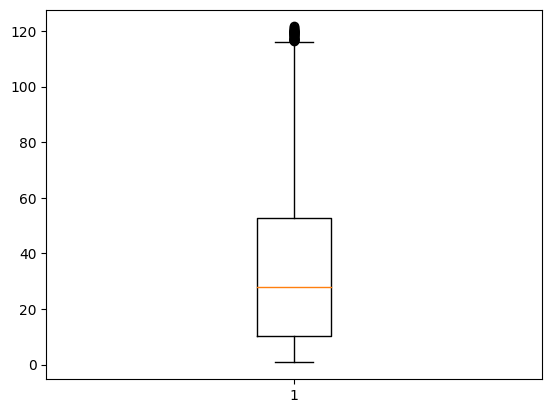

In [ ]:
plt.boxplot(gross_earn_2)
plt.show()

Также, заново постройте гистограмму, при этом передав в нее параметр bins=20 для лучшей визуализации

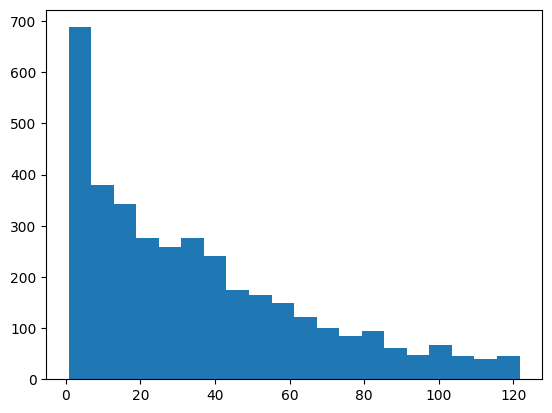

In [ ]:
plt.hist(gross_earn_2, bins=20)
plt.show()

**Выводы:**

Напишите выводы по разделу:
1.   О максимальных и минимальных значениях признака (оцените размах значений).
 * Размах максимального и минимального значения в разделе gross_earn_clear очень большой: от 936.660 до  0.010;
2.   О нулевых значениях (их наличие, нужна ли предобработка).
 * нулевые значения были откорректированны в предыдущем задании;
3.   О средних величинах (среднее, медиана, их отличия, возможные причины).
 * среднее значение 49.078826 и медиана 28.085. Второй показатель является более точным в оценке среднего количества доходов, так как не подвержен влиянию больших или малых значений. Иными словами, медиана расчитывается из упорядоченных значений.
4.   О процентилях (сколько процентов данных не превышают то или иное значение).
 * 10-ый и 25-ый процентили не превышают медиану. 50-ый процентиль равен медиане и это логично, так как 50-процентов ровно половина всех доходов.
5.   О результатах графического анализа (необходимость исключения выбросов, что показывает "ящик с усами", что показывает гистограмма).
 * на обеих графических диаграммах видно, что количество выбросов минимально и не требует исключения.

### **5.2. runtime_clear*

По аналогии проанализируйте продолжительность фильмов

In [ ]:
runtime = dataset['runtime_clear']

In [ ]:
# Рассчитайте максимальное и минимальное значения продолжительностифильмов с помощью методов max() и min() соответственно.

max_value = dataset['runtime_clear'].max()
min_value = dataset['runtime_clear'].min()
print('Наибольшая продолжительность: ', max_value, 'Наименьшая продолжительность: ', min_value)

Наибольшая продолжительность:  366 Наименьшая продолжительность:  45


In [ ]:
# Так как фильмов с минимальной продолжительностью не так много (1 фильм), можно сразу приступить к рассчету других показателей.
# Начнем со среднего значения:

mean_value = dataset['runtime_clear'].mean()
print('Средняя продолжительность фильма: ', mean_value)

Средняя продолжительность фильма:  110.26760563380282


In [ ]:
# Далее, рассчитаем медианное значение:

median_value = dataset['runtime_clear'].median()
print('Медиана продолжительности фильмов: ', median_value)

Медиана продолжительности фильмов:  106.0


In [ ]:
# Наконец, узнаем процентили:

percentile_10_value = dataset['runtime_clear'].quantile(0.10)
percentile_25_value = dataset['runtime_clear'].quantile(0.25)
percentile_50_value = dataset['runtime_clear'].quantile(0.50)
percentile_75_value = dataset['runtime_clear'].quantile(0.75)
percentile_90_value = dataset['runtime_clear'].quantile(0.90)
print('10-й процентиль продолжительности фильмов: ', percentile_10_value)
print('25-й процентиль продолжительности фильмов: ', percentile_25_value)
print('50-й процентиль продолжительности фильмов: ', percentile_50_value)
print('75-й процентиль продолжительности фильмов: ', percentile_75_value)
print('90-й процентиль продолжительности фильмов: ', percentile_90_value)

10-й процентиль продолжительности фильмов:  89.0
25-й процентиль продолжительности фильмов:  96.0
50-й процентиль продолжительности фильмов:  106.0
75-й процентиль продолжительности фильмов:  120.0
90-й процентиль продолжительности фильмов:  135.0


In [ ]:
# С помощью метода describe() выведем все показатели для наглядности:
runtime.describe()

count    4970.000000
mean      110.267606
std        21.441886
min        45.000000
25%        96.000000
50%       106.000000
75%       120.000000
max       366.000000
Name: runtime_clear, dtype: float64

In [ ]:
import matplotlib.pyplot as plt

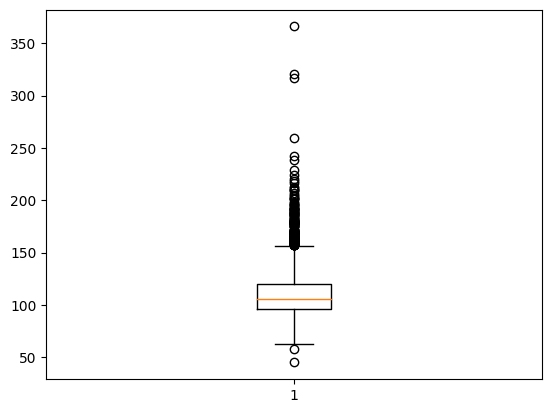

In [ ]:
# Построим диаграмму "Ящик с усами"
plt.boxplot(runtime)
plt.show()

Построив и посмотрев на график, можно сказать, что количество выбросов очень веклико и требуется их исключение.

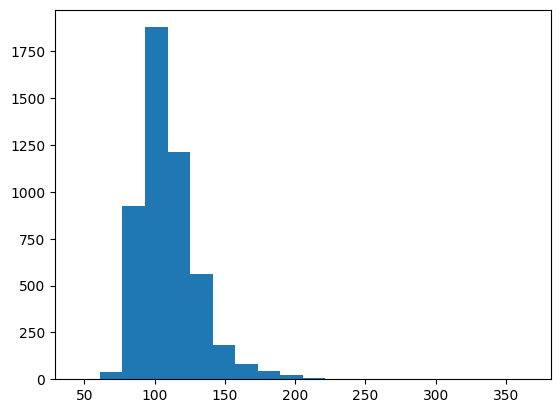

In [ ]:
plt.hist(runtime, bins=20)
plt.show()

## 6. Неграфический и графический анализ категориальных признаков

Выполните неграфический и графический анализ категориальных признаков

### *6.1. certificate*

Описание классификации [the British Board of Film Classification (BBFC)]( https://www.bbfc.co.uk/about-classification/classification-guidelines)

Оцените описательные статистики признака с помощью метода describe()

In [ ]:
dataset['certificate'].describe()

count     4970
unique      15
top         15
freq      1843
Name: certificate, dtype: object

Изучите уникальные значения признака, получив их с помощью метода unique()

In [ ]:
dataset['certificate'].unique()

array(['15', '12A', '18', '12', 'PG', 'X', 'U', 'A', 'AA', 'UA', 'R',
       'PG-13', 'Not Rated', 'Rejected', '(Banned)'], dtype=object)

Проведите неграфический структурный анализ с помощью метода value_counts()

In [ ]:
dataset['certificate'].value_counts()

15           1843
12A           788
18            659
PG            614
U             362
12            278
A             186
X             134
AA             59
R              12
UA             11
PG-13          11
Not Rated       7
Rejected        5
(Banned)        1
Name: certificate, dtype: int64

Сохраните результаты работы метода value_counts() в переменную certificate_counts, отсортировав значения с помощью метода sort_values(), передав в него параметр (ascending=True) (это необходимо для того, чтобы впоследствии столбчатая диаграмма сортировала значения сверху вниз: наибольшее - сверху, наименьшее - снизу)

In [ ]:
certificate_counts = dataset['certificate'].value_counts().sort_values(ascending=True)

Постройте горизонтальную столбчатую диаграмму с помощью метода barh()

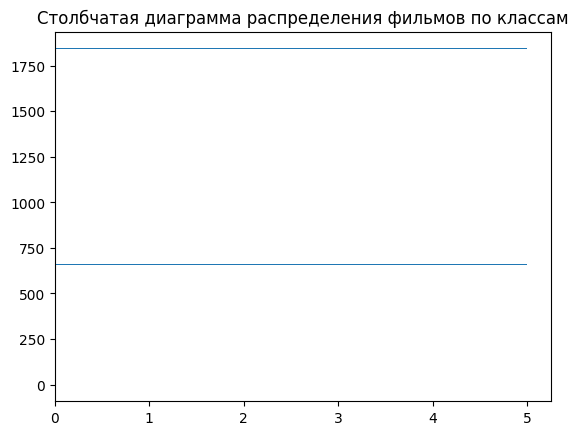

In [ ]:
plt.barh(certificate_counts, 5)
plt.title('Столбчатая диаграмма распределения фильмов по классам')
plt.show()

Выделите топ-5 классов, по которым больше всего фильмов и сохраните результат в переменную certificate_counts_top_5

In [ ]:
certificate_counts_top_5 = dataset['certificate'].value_counts()[:5]


15     1843
12A     788
18      659
PG      614
U       362
Name: certificate, dtype: int64

Постройте круговую диаграмму с помощью метода pie(), добавив подписи данных с помощью параметра labels и подписи значений с помощью параметра autopct='%.1f' (проценты с одним знаком после запятой)

P.s. При анализе категориальных признаков если категорий не больше 5, то предпочтительна круговая диаграмма, в ином случае - столбчатая

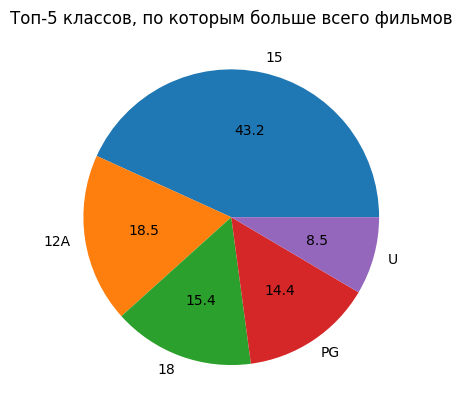

In [ ]:
plt.pie(certificate_counts_top_5.values, labels = certificate_counts_top_5.index, autopct='%.1f')
plt.title('Топ-5 классов, по которым больше всего фильмов')
plt.show()

**Выводы:**

Напишите выводы по разделу:
1.   О количестве уникальных значений признака.
 * Существует пять рейтингов: U, PG, 12A, 15A и 18A. Однако, в данном случае фильмы классифицируются по 15 признакам;
 * 5 признаков от the British Board of Film Classification (BBFC), 7 признаков от MPAA film rating system и три категории вне организаций (Not Rated,
Rejected, (Banned));
2.   О наиболее часто встречаемом значении признака (что за значение, сколько раз встретилось).
 * Чаще всего попадаются фильмы с признаком "15" (1843 записи или 43.2% от общего количества фильмов);
3.   О распределении значений признака (наиболее встречаемые, наименее встречаемые).
  * Меньше всего (менее 10) фильмов с признаками Not Rated,
Rejected, (Banned);
 * Также в таблице имеются признаки, которые относятся к Американской системе классификации: A, X, AA, R, UA, PG-13.
4.   О результатах графического анализа определенного топ признака (что показывает столбчатая и круговая диаграммы).
  * Круговая диаграмми показывает нам топ 5 признаков по количеству фильмов;
 * Признак U означает, что фильм подходит для всех возрастов. Признаки PG, 12A и 15 означают, что фильм содержит материал, который может быть неприемлемым для детей младшего возраста. Признак 18A означает, что фильм предназначен только для взрослых.

### **6.2. rating*

По аналогии проанализируйте рейтинг фильмов

In [ ]:
# Оценим описательные статистики рейтинга с помощью метода describe()
dataset['rating'].describe()

count    4970.000000
mean        6.694004
std         0.967945
min         1.500000
25%         6.100000
50%         6.800000
75%         7.400000
max         9.300000
Name: rating, dtype: float64

In [ ]:
# Изучим уникальные значения рейтинга, получив их с помощью метода unique()
dataset['rating'].unique()

array([9.3, 9. , 8.8, 8.9, 8.7, 9.2, 8.4, 8.6, 8. , 8.5, 8.2, 7.8, 8.3,
       8.1, 7.9, 7.2, 7.6, 7.7, 7.1, 7.4, 7. , 6.5, 7.3, 6.9, 7.5, 6.6,
       6.8, 6.2, 6.4, 6.7, 5.3, 6.1, 5.9, 6.3, 5.8, 5.7, 5.6, 5.5, 4.7,
       4.1, 6. , 5.4, 3.7, 5. , 5.2, 4.9, 4.8, 4. , 4.3, 5.1, 4.6, 2.4,
       2.8, 3.4, 4.5, 1.9, 2.5, 3.9, 3.3, 4.4, 2.6, 3.5, 4.2, 3.8, 2.2,
       3.6, 2.1, 3. , 2.9, 1.5, 3.1, 2.3])

In [ ]:
# Проведем неграфический структурный анализ с помощью метода value_counts()
dataset['rating'].value_counts()

6.7    221
6.4    218
6.6    209
7.2    207
7.0    206
      ... 
9.3      1
2.1      1
2.2      1
8.9      1
2.3      1
Name: rating, Length: 72, dtype: int64

In [ ]:
# Сохраним результаты работы метода value_counts() в переменную rating_counts,
# отсортировав значения с помощью метода sort_values(), передав в него параметр (ascending=True).
rating_counts = dataset['rating'].value_counts().sort_values(ascending=True)

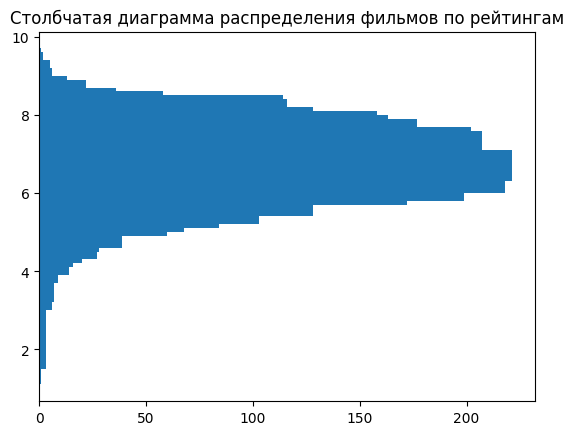

In [ ]:
# Построим горизонтальную столбчатую диаграмму с помощью метода barh()
# Информации на графике гораздо больше, так как рейтингов 72 значения.

plt.barh(rating_counts.index, rating_counts.values)
plt.title('Столбчатая диаграмма распределения рейтингов')
plt.show()

Так как данных очень много, круговая диграмма не получается информативной.

### **6.3. director*

По аналогии проанализируйте кинорежиссеров

---



In [ ]:
# Оценим описательные статистики режиссеров с помощью метода describe()
dataset['director'].describe()

count            4970
unique           1954
top       Woody Allen
freq               38
Name: director, dtype: object

In [ ]:
# Изучим уникальные значения режиссеров, получив их с помощью метода unique()
dataset['director'].unique()

array(['Frank Darabont', 'Christopher Nolan', 'David Fincher', ...,
       'Stan Dragoti', 'Paul Schrader', 'Justin Reardon'], dtype=object)

In [ ]:
# Проведем неграфический структурный анализ с помощью метода value_counts()
dataset['director'].value_counts()

Woody Allen         38
Clint Eastwood      27
Steven Spielberg    27
Alfred Hitchcock    24
Ridley Scott        21
                    ..
Yann Demange         1
Dan Trachtenberg     1
James Gartner        1
Bruce A. Evans       1
Justin Reardon       1
Name: director, Length: 1954, dtype: int64

In [ ]:
# Сохраним результаты работы метода value_counts() в переменную rating_counts,
# отсортировав значения с помощью метода sort_values(), передав в него параметр (ascending=True).
director_counts = dataset['director'].value_counts().sort_values(ascending=True)

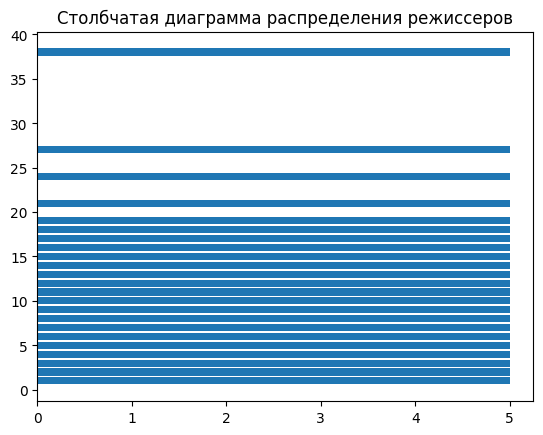

In [ ]:
# Построим столючатую диаграмму по всем режиссерам.
plt.barh(director_counts, 5)
plt.title('Столбчатая диаграмма распределения режиссеров')
plt.show()

In [ ]:
# Выделим топ-5 режиссеров по количеству фильмов в рейтинге.
director_counts_top_5 = dataset['director'].value_counts()[:5]

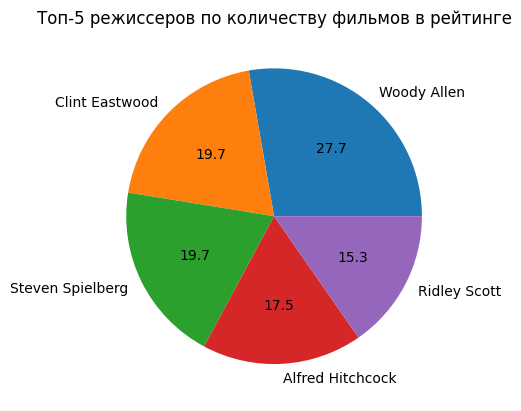

In [ ]:
# Построим круговую диаграмму с топ-5 режиссерами по количеству фильмов. Количество выразим в процентах.
plt.pie(director_counts_top_5.values, labels = director_counts_top_5.index, autopct='%.1f')
plt.title('Топ-5 режиссеров по количеству фильмов в рейтинге')
plt.show()

## 7. Анализ взаимосвязи двух количественных признаков

Выполните анализ взаимосвязи двух количественных признаков

### *7.1. runtime_clear - gross_earn_clear*

Импортируйте библиотеку seaborn и присвойте ей короткое название sns

In [ ]:
import seaborn as sns

Постройте диаграмму совместного распределения двух количественных переменных с помощью функции jointplot(), передав параметры size и alpha для улучшения визуализации

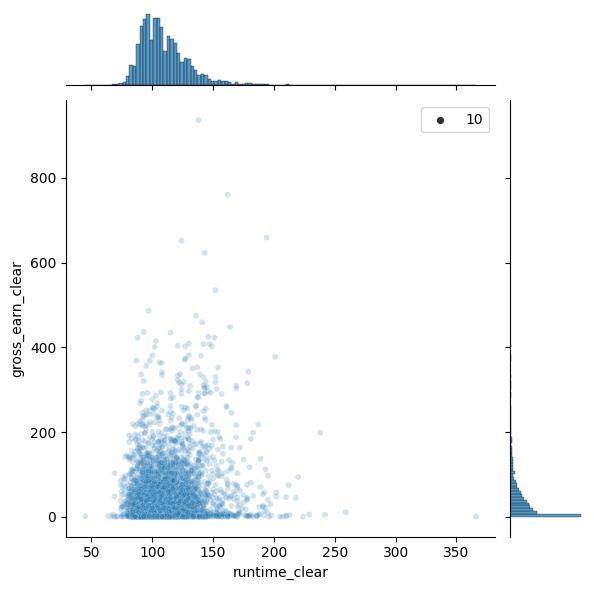

In [ ]:
sns.jointplot(x = 'runtime_clear', y = 'gross_earn_clear', data=dataset, size=10, alpha=0.2)
plt.show()

Сохраните колонки 'runtime_clear' и 'gross_earn_clear' в переменную columns и постройте диаграммы рассеяния, используя функции PairGrid(), map() и метод scatterplot, передав параметр alpha для улучшения визуализации

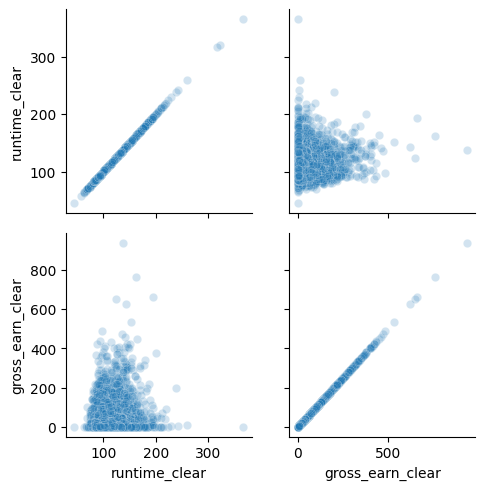

In [ ]:
columns = ['runtime_clear', 'gross_earn_clear']
g = sns.PairGrid(dataset[columns])
g.map(sns.scatterplot, alpha = 0.2)

Исключите выбросы, отфильтровав датасет по 99% процентилю. Для этого сохраните копию исходного датасета в переменную new_dataset с помощью метода copy(). Для каждой колонки в columns ограничьте значения 99% процентилем с помощью метода quantile(), сохраняя объект Series в переменную limiter и фильтруя new_dataset по данному ограничению с помощью оператора <=

In [ ]:
new_dataset = dataset
for col in columns:
  limiter = new_dataset[col].quantile(0.99)
  new_dataset = new_dataset[new_dataset[col]<=limiter]

Постройте диаграммы рассеяния по данным датасета new_dataset, используя функции PairGrid(), map() и метод scatterplot, передав параметр alpha для улучшения визуализации

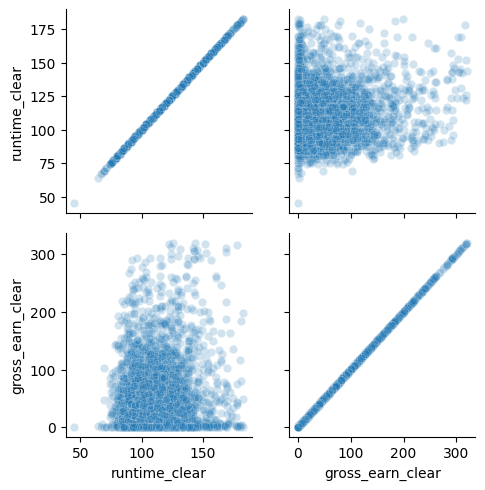

In [ ]:
g = sns.PairGrid(new_dataset[columns])
g.map(sns.scatterplot, alpha = 0.2)

**Выводы:**

Напишите выводы по разделу:
1.   О возможной взаимосвязи признаков (присутствует или отсутствует на диаграммах, какая взаимосвязь (линейная, нелинейная)).
 * на диграммах видно, что существует взаимосвязь между продолжительностью фильма и кассовым сбором.
 * самый большой сбор у фильма продолжительностью ~150 мин.
 А самый маленький у фильма продолжительностью более 250 мин.

## 8. Анализ взаимосвязи двух категориальных признаков

Выполните анализ взаимосвязи двух категориальных признаков

### *8.1. director - certificate*

Сохраните уникальные значения признака 'director', определенные с помощью метода unique(), в переменную directors и определите их количество с помощью функции len()

In [235]:
directors = dataset['director'].unique()
len(directors)

1954

Проведите неграфический структурный анализ признака с помощью метода value_counts()

In [ ]:
dataset['director'].value_counts()

Woody Allen         38
Clint Eastwood      27
Steven Spielberg    27
Alfred Hitchcock    24
Ridley Scott        21
                    ..
Yann Demange         1
Dan Trachtenberg     1
James Gartner        1
Bruce A. Evans       1
Justin Reardon       1
Name: director, Length: 1954, dtype: int64

Определите топ-5 кинорежиссеров с помощью метода value_counts() и среза, выведите их список при помощи атрибута index и сохраните его в переменную directors_top_5

In [ ]:
directors_top_5 = dataset['director'].value_counts()[:5].index
directors_top_5


Index(['Woody Allen', 'Clint Eastwood', 'Steven Spielberg', 'Alfred Hitchcock',
       'Ridley Scott'],
      dtype='object')

Для корректного визуального представления распределения признака 'certificate' создайте словарь, в котором каждому классу будет присвоен соответствующий цвет из выбранной цветовой палитры tab20. Для этого в переменную labels сохраните уникальные значения признака, затем в переменную colors сохраните словарь, сформированный с помощью функции dict() из объединенных (с помощью функции zip()) попарно значения классов, сохраненных в переменной labels, и цветов из палитры tab20, выбранных по длине (len()) labels, с помощью выражения plt.cm.tab20.colors

In [259]:
labels = dataset['certificate'].unique()
colors =dict(zip(labels, plt.cm.tab20.colors[:len(labels)]))
colors

{'15': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 '12A': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 '18': (1.0, 0.4980392156862745, 0.054901960784313725),
 '12': (1.0, 0.7333333333333333, 0.47058823529411764),
 'PG': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 'X': (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 'U': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 'A': (1.0, 0.596078431372549, 0.5882352941176471),
 'AA': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 'UA': (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 'R': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 'PG-13': (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 'Not Rated': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 'Rejected': (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 '(Banned)': (0.4980392156862745, 0.4980392156862745, 0.49803

Для каждого кинорежиссера из топ-5 (directors_top_5) постройте круговые диаграммы с помощью метода pie(). Для этого отфильтруйте исходный датасет признаку director и сохраните его в переменную df; сохраните топ-5 классов фильмов (certificate), определенных с помощью метода value_counts() и среза, в переменную certificate_counts; выведите список уникальных значений топ-5 классов с помощью атрибута index и сохраните его в переменную labels; в качестве названия диаграммы передайте кинорежиссера с помощью метода title(); постройте диаграмму, передав в нее в качестве параметров значения (values), подписи (labels), цвета (colors) и подписи значения в виде процентов autopct='%.1f'

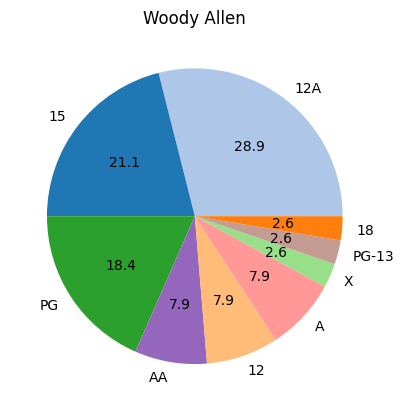

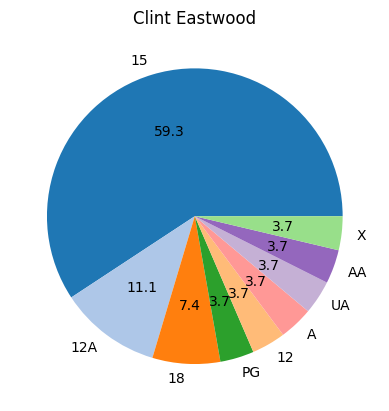

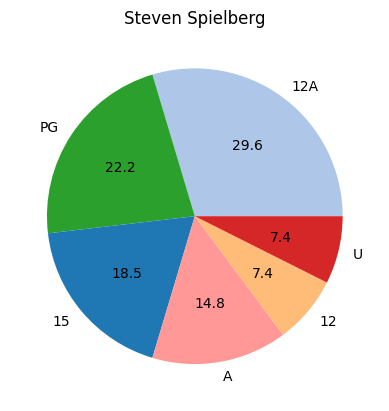

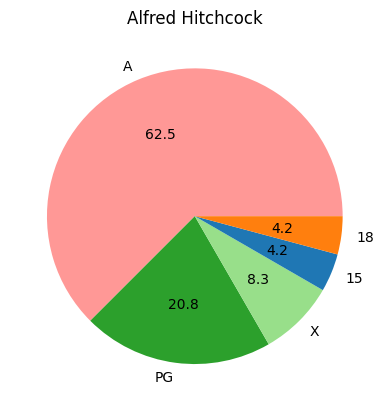

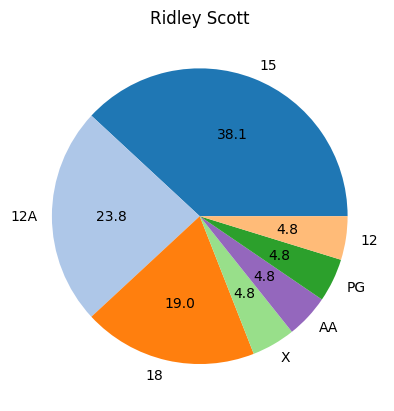

In [260]:
import matplotlib.pyplot as plt

for director in directors_top_5:
  df = dataset[dataset['director'] == director]

  certificate_counts = df['certificate'].value_counts()
  labels = certificate_counts.index

  plt.title(director)
  plt.pie(certificate_counts.values, labels = certificate_counts.index, colors = [colors[key]for key in labels], autopct='%.1f')
  plt.show()

**Выводы:**

Напишите выводы по разделу:
1.   О возможной взаимосвязи признаков (присутствует или отсутствует на диаграммах, похожи ли распределения признаков).
 * Каждая круговая диаграмма соответствует режиссеру и показывает процентное соотношение фильмов по классам.
 * Топ-5 режиссеров снимают фильмы для взрослой аудитории (класс 15 и 12А).
2.   Об особенностях распределения признака в разрезе основного признака (что характерно для каждого значения основного признака)
 * Характерно то, что фильмы для детей младшего возраста (до 13 лет) снимают реже, чем фильмы для подростков и взрослой аудитории.

### **8.2. director - rating*

По аналогии проанализируйте взаимосвязь между рейтингом фильмов и кинорежиссерами

In [277]:
directors = dataset['director'].unique()
len(directors)

1954

In [278]:
dataset['director'].value_counts()

Woody Allen         38
Clint Eastwood      27
Steven Spielberg    27
Alfred Hitchcock    24
Ridley Scott        21
                    ..
Yann Demange         1
Dan Trachtenberg     1
James Gartner        1
Bruce A. Evans       1
Justin Reardon       1
Name: director, Length: 1954, dtype: int64

In [279]:
directors_top_5 = dataset['director'].value_counts()[:5].index
directors_top_5

Index(['Woody Allen', 'Clint Eastwood', 'Steven Spielberg', 'Alfred Hitchcock',
       'Ridley Scott'],
      dtype='object')

In [301]:
labels = dataset['rating'].unique()
colors =dict(zip(labels, plt.cm.tab20.colors[:len(labels)]))
colors

{9.3: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 9.0: (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 8.8: (1.0, 0.4980392156862745, 0.054901960784313725),
 8.9: (1.0, 0.7333333333333333, 0.47058823529411764),
 8.7: (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 9.2: (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 8.4: (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 8.6: (1.0, 0.596078431372549, 0.5882352941176471),
 8.0: (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 8.5: (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 8.2: (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 7.8: (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 8.3: (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 8.1: (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 7.9: (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 7.2: (0.78039215686

KeyError: ignored

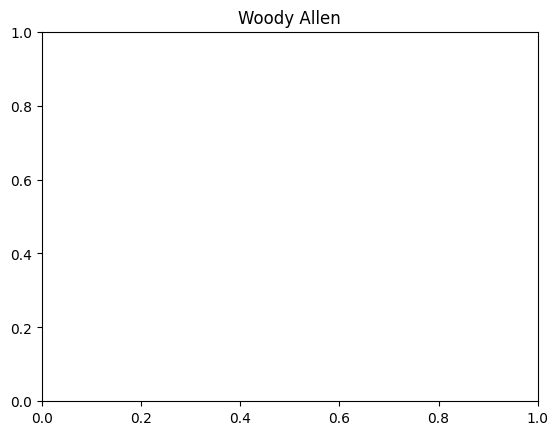

In [305]:
import matplotlib.pyplot as plt

for director in directors_top_5:
  df = dataset[dataset['director'] == director]

  rating_count = df['rating'].value_counts()


  plt.title(director)
  patches, texts = plt.pie(
      rating_count.values,
      labels=rating_count.index,
      colors = [colors[key]for key in labels],
      textprops=dict(color="w"))
  plt.legend(patches, labels, title='gg', loc='upper center', bbox_to_anchor=(1, 0, 0.5, 1))
  plt.show()

### **8.3. certificate - rating*

По аналогии проанализируйте взаимосвязь между классами фильмов и их рейтингом

In [318]:
certificates = dataset['certificate'].unique()
len(certificates)

15

In [309]:
dataset['certificate'].value_counts()

15           1843
12A           788
18            659
PG            614
U             362
12            278
A             186
X             134
AA             59
R              12
UA             11
PG-13          11
Not Rated       7
Rejected        5
(Banned)        1
Name: certificate, dtype: int64

In [319]:
certificate_top_5 = dataset['certificate'].value_counts()[:5].index
certificate_top_5

Index(['15', '12A', '18', 'PG', 'U'], dtype='object')

In [320]:
labels = dataset['rating'].unique()
colors =dict(zip(labels, plt.cm.tab20.colors[:len(labels)]))
colors

{9.3: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 9.0: (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 8.8: (1.0, 0.4980392156862745, 0.054901960784313725),
 8.9: (1.0, 0.7333333333333333, 0.47058823529411764),
 8.7: (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 9.2: (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 8.4: (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 8.6: (1.0, 0.596078431372549, 0.5882352941176471),
 8.0: (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 8.5: (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 8.2: (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 7.8: (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 8.3: (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 8.1: (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 7.9: (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 7.2: (0.78039215686

KeyError: ignored

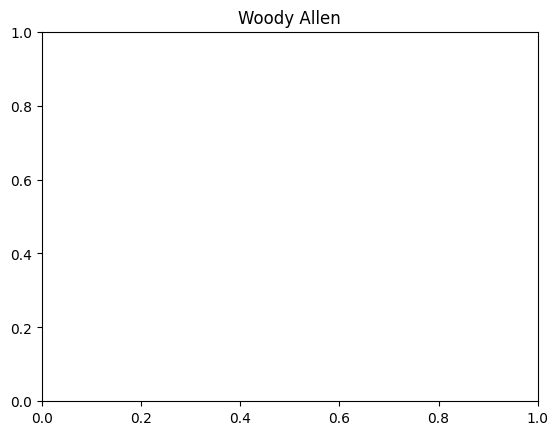

In [321]:
import matplotlib.pyplot as plt

for certificate in certificate_top_5:
  df = dataset[dataset['certificate'] == certificate]

  rating_counts = df['rating'].value_counts()
  labels = rating_counts.index

  plt.title(director)
  plt.pie(rating_counts.values, labels = rating_counts.index, colors = [colors[key]for key in labels], autopct='%.1f')
  plt.show()

## 9. Анализ взаимосвязи количественного и категориального признаков

Выполните анализ взаимосвязи категориального и количественного признаков

### *9.1. certificate - gross_earn_clear*

Оцените медианные значения доходов с фильмов в разрезе классов фильмов. Для этого сгруппируйте датасет по признаку certificate с помощью метода groupby и к Series ['gross_earn_clear'] метод median()

In [333]:
dataset.groupby('certificate')['gross_earn_clear'].median()


certificate
(Banned)        NaN
12           41.580
12A          42.650
15           18.840
18           14.945
A            16.140
AA           27.620
Not Rated     0.060
PG           44.340
PG-13         4.840
R             1.110
Rejected      0.050
U            56.700
UA           54.230
X            14.750
Name: gross_earn_clear, dtype: float64

Оцените описательные статистики доходов с фильмов в разрезе классов фильмов, также сгруппировав таблицу и применив метод describe()

In [350]:
dataset.groupby('certificate')['gross_earn_clear'].describe()

,count,mean,std,min,25%,50%,75%,max
certificate,,,,,,,,
(Banned),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,269.0,60.113048,66.805332,0.04,20.5500,41.580,72.220,659.33
12A,757.0,77.310925,100.261041,0.00,15.2700,42.650,95.000,936.66
15,1719.0,33.451798,42.503809,0.00,3.6100,18.840,45.870,363.07
18,600.0,26.607200,34.639021,0.00,2.5375,14.945,36.875,370.78
A,126.0,37.906190,50.157244,0.01,3.3925,16.140,51.245,260.00
AA,52.0,38.855769,37.479422,0.02,7.2700,27.620,57.635,139.88
Not Rated,5.0,3.830000,8.231376,0.01,0.0200,0.060,0.510,18.55
PG,581.0,64.011360,66.772893,0.01,18.6000,44.340,81.060,402.45


from matplotlib import pyplot as plt
_df_0['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['min'].plot(kind='hist', bins=20, title='min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='count', y='mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='mean', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='std', y='min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='min', y='25%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['min'].plot(kind='line', figsize=(8, 4), title='min')
plt.gca().spines[['top', 'right']].set_visible(False)

Постройте диаграммы "ящик с усами" с помощью метода boxplot(), передав в качестве x - значения классов, а в качестве y - доход с фильмов

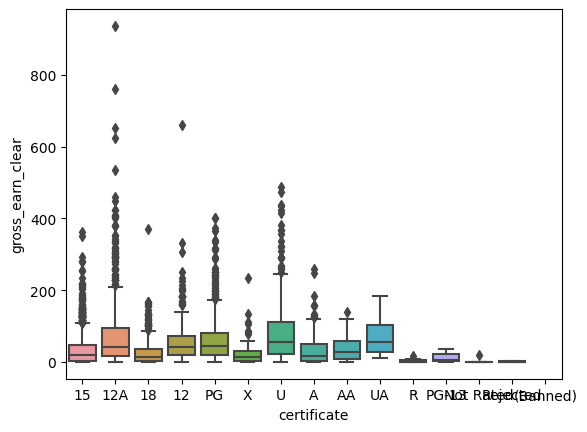

In [361]:
import seaborn as sns
sns.boxplot(x='certificate', y='gross_earn_clear', data= dataset)
plt.show()

Диаграмма получилась малоинформативна в связи с наличием выбросов, а также ее нагруженностью по количеству значений классов. Оцените количество значений классов с помощью метода value_counts()

In [388]:
dataset['certificate'].value_counts()

15           1843
12A           788
18            659
PG            614
U             362
12            278
A             186
X             134
AA             59
R              12
UA             11
PG-13          11
Not Rated       7
Rejected        5
(Banned)        1
Name: certificate, dtype: int64

По итогу оценки видно, что крупных классов - 8, поэтому ограничим диаграмму топ-8 классов. Для этого сохраните список топ-8 классов, определенный с помощью метода value_counts(), среза и атрибута index, в переменную certificate_list

In [375]:
certificate_list = dataset['certificate'].value_counts()[:8].index
certificate_list

Index(['15', '12A', '18', 'PG', 'U', '12', 'A', 'X'], dtype='object')

Отфильтруйте исходный датасет по признаку certificate с помощью метода isin() и сохраните его в переменную dataset_certificate_top_8. Оцените размеры датасета с помощью атрибута shape

In [376]:
dataset_certificate_top_8 = dataset[dataset['certificate'].isin(certificate_list)]
dataset_certificate_top_8.shape

(4864, 13)

Постройте диаграммы "ящик с усами" с помощью метода boxplot(), передав в качестве x - значения классов, а в качестве y - доход с фильмов, при этом ограничив значение оси y на отметке 25000 с помощью функции plt.axis() и параметров ymin и ymax

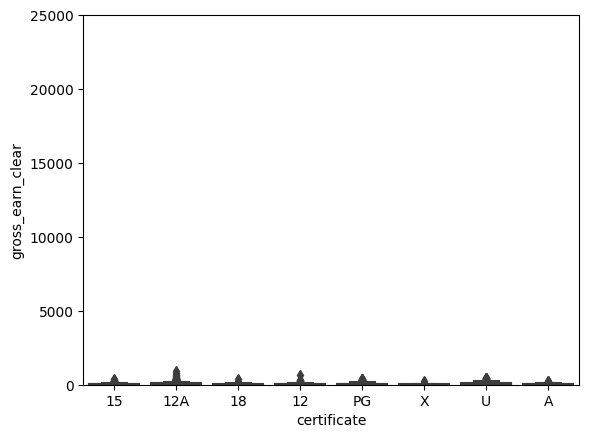

In [394]:
import seaborn as sns
sns.boxplot(x='certificate', y="gross_earn_clear", data=dataset_certificate_top_8)
plt.axis(ymin=0, ymax=25000)
plt.show()

**Выводы:**

Напишите выводы по разделу:
1.   О возможной взаимосвязи признаков (присутствует или отсутствует на диаграммах, похожи ли распределения признаков).
 * По диаграмме видно, что взаимосвязь есть. Чем класс выше, тем меньше сбор.
2.   Об особенностях распределения признака в разрезе основного признака (что характерно для каждого значения основного признака).
 * Самый большой сбор у класса 12А. Самый маленький - у класса Х
3.   О средних величинах (как распределена медиана).
 * у классов 12А, 12, PG - медиана практически на одном уровне
 * у классов 15, 18, Х, А - медиана также практически совпадает.

### **9.2. certificate - runtime_clear*

По аналогии проанализируйте взаимосвязь между классами фильмов и их продолжительностью

In [395]:
# Оценим медианные значения нужных разделов:
dataset.groupby('certificate')['runtime_clear'].median()

certificate
(Banned)      91.0
12           107.0
12A          112.0
15           106.0
18           104.0
A            110.0
AA           109.0
Not Rated     95.0
PG           105.0
PG-13         95.0
R            118.0
Rejected      84.0
U             96.0
UA           121.0
X            108.0
Name: runtime_clear, dtype: float64

In [398]:
# Оценим описательные статистики нужных разделов:
dataset.groupby('certificate')['runtime_clear'].describe()

,count,mean,std,min,25%,50%,75%,max
certificate,,,,,,,,
(Banned),1.0,91.000000,NaN,91.0,91.0,91.0,91.00,91.0
12,278.0,109.982014,18.809794,80.0,97.0,107.0,120.00,194.0
12A,788.0,115.449239,20.309016,75.0,100.0,112.0,127.00,213.0
15,1843.0,109.385241,18.523197,69.0,96.0,106.0,119.00,202.0
18,659.0,109.033384,21.216186,71.0,95.0,104.0,117.00,321.0
A,186.0,114.397849,26.469417,58.0,97.0,110.0,125.75,212.0
AA,59.0,114.949153,24.715920,85.0,98.0,109.0,124.50,205.0
Not Rated,7.0,103.000000,17.406895,87.0,92.0,95.0,110.50,134.0
PG,614.0,110.058632,23.005847,70.0,95.0,105.0,118.00,259.0


In [397]:
# Ограничим диаграмму топ-8 классов
certificate_list = dataset['certificate'].value_counts()[:8].index
certificate_list

15           1843
12A           788
18            659
PG            614
U             362
12            278
A             186
X             134
AA             59
R              12
UA             11
PG-13          11
Not Rated       7
Rejected        5
(Banned)        1
Name: certificate, dtype: int64

In [399]:
dataset_certificate_top_8 = dataset[dataset['certificate'].isin(certificate_list)]
dataset_certificate_top_8.shape

(4864, 13)

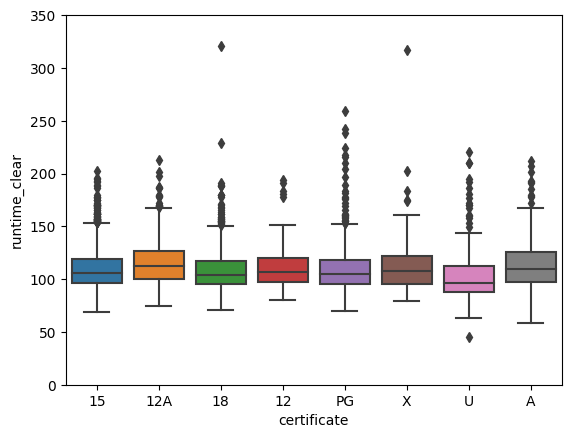

In [405]:
# Построим диграмму "Ящик с усами" и ограничим значение по у
import seaborn as sns
sns.boxplot(x='certificate', y="runtime_clear", data=dataset_certificate_top_8)
plt.axis(ymin=0, ymax=350)
plt.show()

### **9.3. director - gross_earn_clear*

По аналогии проанализируйте взаимосвязь между кинорежиссерами и доходами с фильмов

In [407]:
# Оценим медианные значения нужных разделов:
dataset.groupby('director')['gross_earn_clear'].median()

director
A.R. Murugadoss        2.43
Aamir Khan             1.22
Aanand L. Rai          0.88
Aaron Blaise          85.34
Aaron Schneider        9.18
                      ...  
Zal Batmanglij         2.27
Zaza Urushadze         0.14
Zoya Akhtar            3.11
Álex de la Iglesia     0.00
Ömer Faruk Sorak        NaN
Name: gross_earn_clear, Length: 1954, dtype: float64

In [408]:
# Оценим описательные статистики нужных разделов:
dataset.groupby('director')['gross_earn_clear'].describe()

,count,mean,std,min,25%,50%,75%,max
director,,,,,,,,
A.R. Murugadoss,1.0,2.43,NaN,2.43,2.43,2.43,2.43,2.43
Aamir Khan,1.0,1.22,NaN,1.22,1.22,1.22,1.22,1.22
Aanand L. Rai,1.0,0.88,NaN,0.88,0.88,0.88,0.88,0.88
Aaron Blaise,1.0,85.34,NaN,85.34,85.34,85.34,85.34,85.34
Aaron Schneider,1.0,9.18,NaN,9.18,9.18,9.18,9.18,9.18
...,...,...,...,...,...,...,...,...
Zal Batmanglij,1.0,2.27,NaN,2.27,2.27,2.27,2.27,2.27
Zaza Urushadze,1.0,0.14,NaN,0.14,0.14,0.14,0.14,0.14
Zoya Akhtar,1.0,3.11,NaN,3.11,3.11,3.11,3.11,3.11


In [409]:
# Ограничим диаграмму - выберем топ-5 режиссеров
director_list = dataset['director'].value_counts()[:5].index
director_list

Index(['Woody Allen', 'Clint Eastwood', 'Steven Spielberg', 'Alfred Hitchcock',
       'Ridley Scott'],
      dtype='object')

In [411]:
# Отфильтруем исходный датасет по признаку director с помощью метода isin() и сохраните его в переменную dataset_director_top_5
# Оценим размеры датасета с помощью атрибута shape
dataset_director_top_5 = dataset[dataset['director'].isin(director_list)]
dataset_director_top_5.shape

(137, 13)

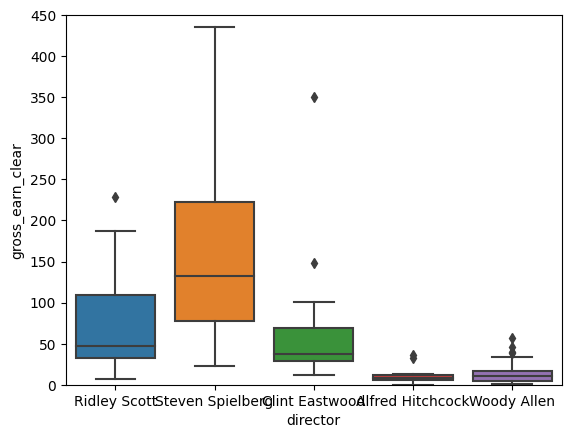

In [418]:
# Построим диграмму "Ящик с усами" и ограничим значение по у
import seaborn as sns
sns.boxplot(x='director', y="gross_earn_clear", data=dataset_director_top_5)
plt.axis(ymin=0, ymax=450)
plt.show()

### **9.4. director - runtime_clear*

По аналогии проанализируйте взаимосвязь между кинорежиссерами и продолжительностью фильмов

In [420]:
# Оценим медианные значения нужных разделов:
dataset.groupby('director')['runtime_clear'].median()

director
A.R. Murugadoss       186.0
Aamir Khan            165.0
Aanand L. Rai         134.0
Aaron Blaise           85.0
Aaron Schneider       103.0
                      ...  
Zal Batmanglij        116.0
Zaza Urushadze         87.0
Zoya Akhtar           155.0
Álex de la Iglesia    108.0
Ömer Faruk Sorak      127.0
Name: runtime_clear, Length: 1954, dtype: float64

In [421]:
# Оценим описательные статистики нужных разделов:
dataset.groupby('director')['runtime_clear'].describe()

,count,mean,std,min,25%,50%,75%,max
director,,,,,,,,
A.R. Murugadoss,1.0,186.0,NaN,186.0,186.0,186.0,186.0,186.0
Aamir Khan,1.0,165.0,NaN,165.0,165.0,165.0,165.0,165.0
Aanand L. Rai,2.0,134.0,8.485281,128.0,131.0,134.0,137.0,140.0
Aaron Blaise,1.0,85.0,NaN,85.0,85.0,85.0,85.0,85.0
Aaron Schneider,1.0,103.0,NaN,103.0,103.0,103.0,103.0,103.0
...,...,...,...,...,...,...,...,...
Zal Batmanglij,1.0,116.0,NaN,116.0,116.0,116.0,116.0,116.0
Zaza Urushadze,1.0,87.0,NaN,87.0,87.0,87.0,87.0,87.0
Zoya Akhtar,1.0,155.0,NaN,155.0,155.0,155.0,155.0,155.0


In [422]:
# Ограничим диаграмму - выберем топ-5 режиссеров
director_list = dataset['director'].value_counts()[:5].index
director_list

Index(['Woody Allen', 'Clint Eastwood', 'Steven Spielberg', 'Alfred Hitchcock',
       'Ridley Scott'],
      dtype='object')

In [423]:
# Отфильтруем исходный датасет по признаку director с помощью метода isin() и сохраните его в переменную dataset_director_top_5
# Оценим размеры датасета с помощью атрибута shape
dataset_director_top_5 = dataset[dataset['director'].isin(director_list)]
dataset_director_top_5.shape

(137, 13)

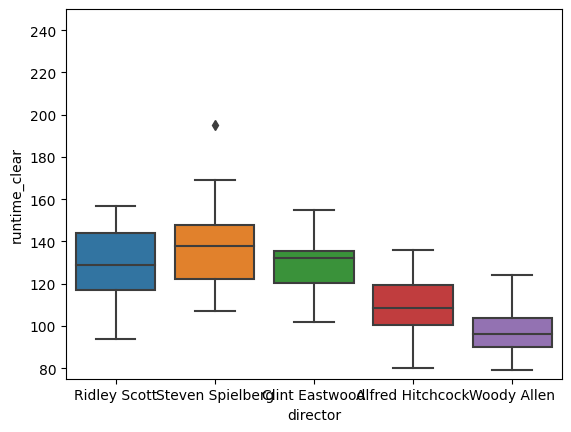

In [429]:
# Построим диграмму "Ящик с усами" и ограничим значения по у
import seaborn as sns
sns.boxplot(x='director', y="runtime_clear", data=dataset_director_top_5)
plt.axis(ymin=75, ymax=250)
plt.show()

### **9.5. rating - gross_earn_clear*

По аналогии проанализируйте взаимосвязь между рейтингом фильмов и доходами с фильмов

In [430]:
# Оценим медианные значения нужных разделов:
dataset.groupby('rating')['gross_earn_clear'].median()

rating
1.5      9.11
1.9      4.92
2.1     10.25
2.2     17.02
2.3      4.27
        ...  
8.8    304.06
8.9    107.93
9.0     96.90
9.2    134.97
9.3     28.34
Name: gross_earn_clear, Length: 72, dtype: float64

In [431]:
# Оценим описательные статистики нужных разделов:
dataset.groupby('rating')['gross_earn_clear'].describe()

,count,mean,std,min,25%,50%,75%,max
rating,,,,,,,,
1.5,1.0,9.110,NaN,9.11,9.1100,9.11,9.1100,9.11
1.9,3.0,6.380,7.192016,0.03,2.4750,4.92,9.5550,14.19
2.1,1.0,10.250,NaN,10.25,10.2500,10.25,10.2500,10.25
2.2,1.0,17.020,NaN,17.02,17.0200,17.02,17.0200,17.02
2.3,1.0,4.270,NaN,4.27,4.2700,4.27,4.2700,4.27
...,...,...,...,...,...,...,...,...
8.8,6.0,220.675,155.433465,6.10,100.9175,304.06,326.5725,342.55
8.9,1.0,107.930,NaN,107.93,107.9300,107.93,107.9300,107.93
9.0,5.0,214.254,230.224819,4.36,57.3000,96.90,377.8500,534.86


In [439]:
# Возьмем 8 показателей рейтинга
rating_list = dataset['rating'].value_counts()[:8].index
rating_list

Float64Index([6.7, 6.4, 6.6, 7.2, 7.0, 7.3, 6.2, 7.1, 6.8, 6.9, 6.5, 7.5, 7.4,
              6.1, 6.3, 7.6, 7.7, 7.8, 5.8, 6.0, 8.0],
             dtype='float64')

In [445]:
# Отфильтруем исходный датасет по признаку rating с помощью метода isin() и сохраним его
dataset_rating_top_8 = dataset[dataset['rating'].isin(rating_list)]
dataset_rating_top_8.shape

(3726, 13)

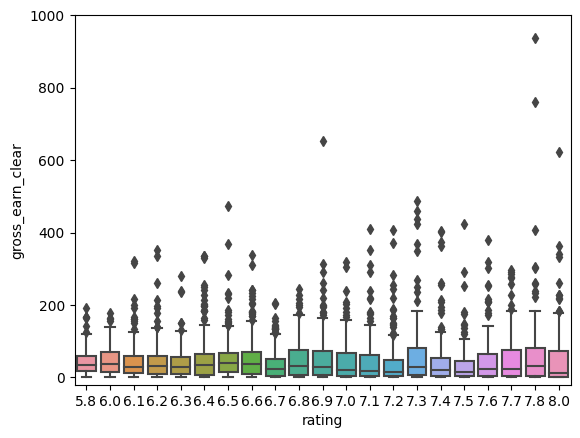

In [459]:
# Построим диграмму "Ящик с усами" и ограничим значения по у
import seaborn as sns
sns.boxplot(x='rating', y="gross_earn_clear", data=dataset_rating_top_8)
plt.axis(ymin=-20 , ymax=1000)
plt.show()

### **9.6. rating - runtime_clear*

По аналогии проанализируйте взаимосвязь между рейтингом фильмов и их продолжительностью

In [446]:
# Оценим медианные значения нужных разделов:
dataset.groupby('rating')['runtime_clear'].median()

rating
1.5     88.0
1.9     87.0
2.1     90.0
2.2     94.0
2.3    104.0
       ...  
8.8    148.0
8.9    154.0
9.0    195.0
9.2    131.0
9.3    142.0
Name: runtime_clear, Length: 72, dtype: float64

In [447]:
# Оценим описательные статистики нужных разделов:
dataset.groupby('rating')['runtime_clear'].describe()

,count,mean,std,min,25%,50%,75%,max
rating,,,,,,,,
1.5,1.0,88.000000,NaN,88.0,88.0,88.0,88.0,88.0
1.9,3.0,86.333333,5.033223,81.0,84.0,87.0,89.0,91.0
2.1,1.0,90.000000,NaN,90.0,90.0,90.0,90.0,90.0
2.2,1.0,94.000000,NaN,94.0,94.0,94.0,94.0,94.0
2.3,1.0,104.000000,NaN,104.0,104.0,104.0,104.0,104.0
...,...,...,...,...,...,...,...,...
8.8,6.0,155.666667,18.029605,139.0,143.5,148.0,170.5,179.0
8.9,1.0,154.000000,NaN,154.0,154.0,154.0,154.0,154.0
9.0,5.0,169.200000,45.844302,96.0,152.0,195.0,201.0,202.0


In [448]:
# Возьмем 8 показателей рейтинга
rating_list = dataset['rating'].value_counts()[:8].index
rating_list

Float64Index([6.7, 6.4, 6.6, 7.2, 7.0, 7.3, 6.2, 7.1, 6.8, 6.9, 6.5, 7.5, 7.4,
              6.1, 6.3, 7.6, 7.7, 7.8, 5.8, 6.0, 8.0],
             dtype='float64')

In [449]:
# Отфильтруем исходный датасет по признаку rating с помощью метода isin() и сохраним его
dataset_rating_top_8 = dataset[dataset['rating'].isin(rating_list)]
dataset_rating_top_8.shape

(3726, 13)

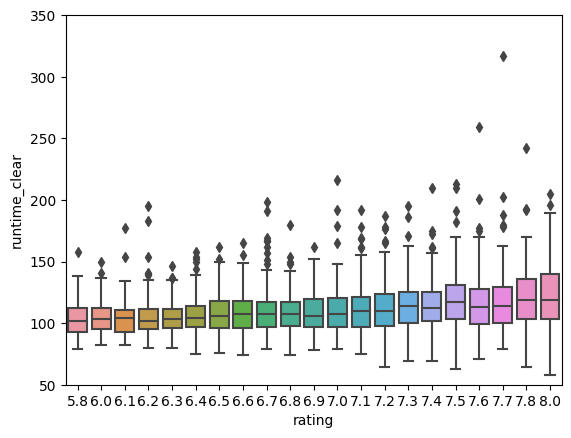

In [455]:
# Построим диграмму "Ящик с усами" и ограничим значения по у
import seaborn as sns
sns.boxplot(x='rating', y="runtime_clear", data=dataset_rating_top_8)
plt.axis(ymin=50, ymax=350)
plt.show()

## 10. Общий вывод

Соберите промежуточные выводы в итоговый вывод по разведочному анализу
* Из проделанной работы можно сделать общий вывод, что все показатели взаимосвязанны друг с другом;
* Режиссеры чаще всего снимают фильмы для зрителей подросткового возраста и старше;
* Рейтинг фильма никак не влияет на его продолжительность.
* Фильмы с рейтингом выше 5.0 собирают довольно большую кассу.
* каждый режиссер снимает в своем хронометраже.
* Стивен Спилберг собрал самую большую кассу в топ-5.
* Альфред Хичкок собрал самую маленькую кассу в топ-5.
* Большинство фильмов независимо от класса имеют одинаковую продолжительность ~120 мин.
* Чем класс выше, тем меньше сбор.
у классов 12А, 12, PG - медиана практически на одном уровне
у классов 15, 18, Х, А - медиана также практически совпадает.


**Поздравляем! Часть 2 задания по модулю EDA выполнена! Далее Вас ожидают кейсы на фильтрацию, срезы и группировку!**